
# Модель режима потока пара через штуцер
## $ Q_г=28.31993658 Q_{крит} $

### $ при:   \frac{P_d}{P_o} <= (\frac{P_d}{P_o})_{крит}  $     

##  $и$

## $ Q_г=28.31993658 Q_{крит} * \frac{C_o}{C_1} $

### $ при:    \frac{P_d}{P_o} > (\frac{P_d}{P_o})_{крит} $

## $где$

### $(\frac{P_d}{P_o})_{крит} = \frac{2}{(k + 1)}^\frac{k}{(k - 1)}$

### $Q_{крит} = \frac{155.5 * C_d * A * P_o * C_1 * C_2}{\gamma_g * (T + 460)}$

### $A=\frac{pi*d^2}{4}$

### $C_1 =  ((\frac{P_d}{P_o})_{крит}^{\frac{2}{k}} - (\frac{P_d}{P_o})_{крит}^{1 +\frac{1}{k}})^ {0.5}$

### $C_2 = (\frac{2 * g * k} {k - 1})^{0.5}$

### $C_o = ((\frac{P_d}{P_o})^{\frac{2}{k}} - (\frac{P_d}{P_o})^{1 +\frac{1}{k}})^ {0.5}$

### $C_d = 0.865$

### $g=32.17,$  $\frac{ft}{sec^2}$

### $d$ - диаметр штуцера, inch

###   $P_o$ - давление до штуцера, psi

###    $P_d$ - давление после штуцера, psi

### $T$ - температура, $ ^{\circ}\mathrm{F}$ 

### $k$ - показатель адиабаты

### $\gamma_g$ -  относительная плотность газа

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *

In [12]:
# Расход газа через штуцер в зависимости от диаметра штуцера, давлений до и после,
# удельной плотности газа, температуры, показателя адиабаты
d_mm=5 # диаметр штуцера, мм
Po_atm=15 # давление до штуцера, атм
Pd_atm=10 # давление после штуцера, атм
ro_g=1 # удельная плотность пара
Tu_C=20 # температура 
k=1.3 # показатель адиабаты
def Q_gas_valve_m3d(d_mm, Pu_atm, Pd_atm, ro_g, Tu_C):
    d_in = d_mm * 0.03937 # диаметр штуцера, дюйм
    Po_psi = Po_atm * 14.2233 # давление до штуцера, psi
    Pd_psi = Pd_atm * 14.2233 # давление после штуцера, psi
    Tu_F = Tu_C / 100 * 180 + 32 # температура, F
    Pd_Po_crit = (2 / (k + 1)) ** (k / (k - 1)) # критическое отношение давлений до и после штуцера
    Cd = 0.865
    g = 32.17 # ft/sec^2 
    C1 = (Pd_Po_crit ** (2 / k) - Pd_Po_crit ** (1 + 1 / k)) ** 0.5
    C2 = (2 * g * k / (k - 1)) ** 0.5
    A=3.14*d_in**2/4 # площадь
    Qg_crit = 155.5 * Cd * A * Po_psi * C1 * C2 / (ro_g * (Tu_F + 460)) #критический расход пара
    Pd_Po = Pd_atm / Po_atm
    C0 = ((Pd_Po ** (2 / k) - Pd_Po ** (1 + 1 / k))) ** 0.5
    if Pd_Po <= Pd_Po_crit: 
        Q_gas_valve_m3d = Qg_crit * 28.31993658
    else: 
        Q_gas_valve_m3d = Qg_crit * 28.31993658 * C0 / C1
    return Q_gas_valve_m3d
print (Q_gas_valve_m3d(d_mm, Po_atm, Pd_atm, ro_g, Tu_C))

171.04860408573742


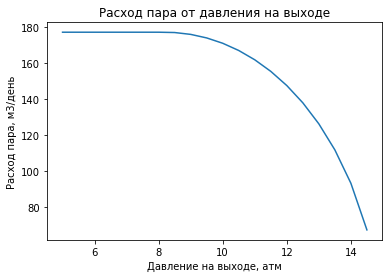

In [13]:
# Расход газа через штуцер в зависимости от давления после штуцера, при других постоянных параметрах
d_mm=5 # диаметр штуцера, мм
Po_atm=15 # давление до штуцера, атм
ro_g=1 # удельная плотность пара
Tu_C=20 # температура 
k=1.3 # показатель адиабаты
Pd_atm_a = np.arange(5,15,0.5) # давление после штуцера, атм
def Q_gas_valve_m3d(d_mm, Pu_atm, Pd_atm, ro_g, Tu_C):
    d_in = d_mm * 0.03937 # диаметр штуцера, дюйм
    Po_psi = Po_atm * 14.2233 # давление до штуцера, psi
    Pd_psi = Pd_atm * 14.2233 # давление после штуцера, psi
    Tu_F = Tu_C / 100 * 180 + 32 # температура, F
    Pd_Po_crit = (2 / (k + 1)) ** (k / (k - 1)) # критическое отношение давлений до и после штуцера
    Cd = 0.865
    g = 32.17 # ft/sec^2 
    C1 = (Pd_Po_crit ** (2 / k) - Pd_Po_crit ** (1 + 1 / k)) ** 0.5
    C2 = (2 * g * k / (k - 1)) ** 0.5
    A=3.14*d_in**2/4 # площадь
    Qg_crit = 155.5 * Cd * A * Po_psi * C1 * C2 / (ro_g * (Tu_F + 460)) #критический расход пара
    Pd_Po = Pd_atm / Po_atm
    C0 = ((Pd_Po ** (2 / k) - Pd_Po ** (1 + 1 / k))) ** 0.5
    if Pd_Po <= Pd_Po_crit: 
        Q_gas_valve_m3d = Qg_crit * 28.31993658
    else: 
        Q_gas_valve_m3d = Qg_crit * 28.31993658 * C0 / C1
    return Q_gas_valve_m3d
q=np.array([])
for pd in Pd_atm_a:
    p1=Q_gas_valve_m3d(d_mm, Po_atm, pd, ro_g, Tu_C)
    q=np.append(q,p1)
plt.plot(Pd_atm_a,q)
plt.title('Расход пара от давления на выходе')
plt.xlabel('Давление на выходе, атм')
plt.ylabel('Расход пара, м3/день')
plt.show() 